In [21]:
import geopandas as gpd

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Census Tracts

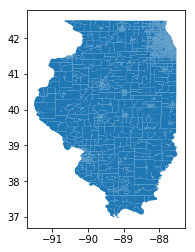

In [34]:
geo_df = gpd.read_file("/Users/Xinyuan/Downloads/hw-4-MeredithZ-master/data")
geo_df.plot()

Import the tracts for Chicago

In [ ]:
tract_df = gpd.read_file("/Users/Xinyuan/Downloads/hw-4-MeredithZ-master/data")

In [24]:
tract_df = tract_df[tract_df["COUNTYFP"] == "031"]
tract_df.rename(columns = {"NAME" : "Census Tract"}, inplace = True)

There is latitudes and longitudes in our csv file. Import the csv and make the geometry

In [25]:
above_df = pd.read_csv("3yearabove80.csv", usecols = [2, 3])
above_df.dropna(inplace = True)

To make the geometry, do a list comprehension to create a point from every (longitude, latitude) pair.

In [27]:
above_df.columns.tolist()

['latitude', 'longitude']

In [28]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in 
            zip(above_df.longitude, 
                above_df.latitude)]
above_coords = gpd.GeoDataFrame(above_df, 
                                crs = {'init': 'epsg:4269'}, 
                                geometry=geometry)

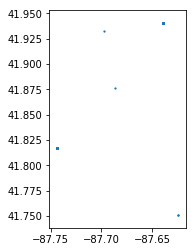

In [36]:
above_df.plot(markersize = 1.5)

# Spatial Join of Violations Zip code Areas

In [30]:
above_df= gpd.sjoin(above_coords, tract_df, how = 'left', op = 'within')

Aggregate these groupby data to get a count per Census Tract

In [31]:
violation_tract_count = above_df.groupby("Census Tract").count()

Every column is the violation account

In [32]:
violation_tract_count = violation_tract_count[["index_right"]].rename(columns = {"index_right" : "Violation"})

Put the GeoDataFrame on the left

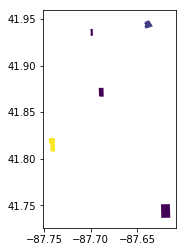

In [33]:
mapped_violations = pd.merge(tract_df, violation_tract_count, how = "inner", left_on = "Census Tract", right_index = True)
mapped_violations.plot(column = "Violation", k = 9, linewidth = 0)

# With Zipcode areas

In [35]:
zipcode_df = gpd.read_file("Zip_Codes.geojson")

In [ ]:
above_coords = gpd.GeoDataFrame(above_df, crs = zipcode_df, geometry=geometry)

In [37]:
above_df = gpd.tools.sjoin(above_coords, zipcode_df, how = 'left', op = 'within')

In [39]:
above_df.rename(columns = {"index_right" : "Violation"}, inplace = True)
violation_area_count = above_df.groupby("zipcode").count()[["Violation"]]

mapped_violations = pd.merge(zipcode_df, violation_area_count, how = "inner", left_on = "zipcode", right_index = True)
ax = mapped_violation.plot(column = "Violation", k = 9, linewidth = 0)

ax.set_axis_off()

KeyError: 'zipcode'